# <center> <div class="alert-block alert-info alert"> <span style="color:green;"> Nigeria Temperature Change Forecasting Using Machine Learning </center>

**Project Overview**

The rapid growing world population is threatened by increase in land surface air temperature associated with rising greenhouse gas concentrations.
The project seeks to perform a time series forecasting for Nigeria's Environment temperature change over a time period of 60 years (1961 - 2021) using Prophet model based on FAOSTAT Temperature Change statistics. The forecast will help to identify  risk  and  design  the  responses  necessary  to  safeguard  the  agriculture,  forestry  and  fisheries sectors in the future.


**About the model**

Prophet is a method for predicting time series data that uses an additive model to suit non-linear trends with seasonality that occurs annually, monthly, daily, and on weekends as well as during holidays. It functions best when combined with historical data from multiple seasons and time series with substantial seasonal influences. Prophet is resilient to missing data and changes in the trend and typically handles outliers well.

## Dataset

The dataset contains FAOSTAT Climate Change – Environment Temperature statistics of mean surface temperature change of Nigeria for the period 1961–2021. 

Data: 
FAO, 2022. FAOSTAT Climate Change, Temperature Change, available at: 
http://www.fao.org/faostat/en/#data/ET . FAO, Rome Italy.

The data used for this analysis can be accessed here: `"data/NigeriaETchangeDataset.csv"`

The dataset was processed for the project I built using the ARIMA model. 



| Column Name      | Criteria                                                                                                                                                                    |
|------------------|-----------------------------------------------------------------------------------------------------------------------------------------------------------------------------|
| Date             | Monthly date (1961 - 2021).                                                                                         |
| Temp   | Numeric, value for mean temperature (°C).                                                                                         |

In [1]:
# To install Facebook Prophet, use this command:

# ! pip install prophet

In [2]:
# import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import plotly.express as px
from prophet import Prophet 

import warnings
warnings.filterwarnings('ignore', category=FutureWarning)

%matplotlib inline

In [3]:
# load csv file
df = pd.read_csv('data/NigeriaETchangeDataset.csv', parse_dates=['date'])
print("Data imported successfully")

Data imported successfully


In [4]:
# peek into the dataset by printing out the first five rows
df.head()

,date,temp
0,1961-01-31,0.477
1,1961-02-28,-2.256
2,1961-03-31,-0.904
3,1961-04-30,0.045
4,1961-05-31,0.532


In [5]:
# peek into the dataset by printing out the last five rows
df.tail()

,date,temp
727,2021-08-31,0.924
728,2021-09-30,1.157
729,2021-10-31,1.602
730,2021-11-30,2.329
731,2021-12-31,1.307


In [6]:
# check the data properties
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 732 entries, 0 to 731
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    732 non-null    datetime64[ns]
 1   temp    732 non-null    float64       
dtypes: datetime64[ns](1), float64(1)
memory usage: 11.6 KB


In [7]:
# check the shape of the dataset i.e. the number of rows and columns
df.shape

(732, 2)

In [8]:
# Print out columns containing null values
df.isnull().sum()

date    0
temp    0
dtype: int64

In [9]:
# Descriptive statistics
df.describe()

,temp
count,732.000000
mean,0.570210
std,0.818319
min,-2.832000
25%,0.055000
50%,0.595500
75%,1.124250
max,3.374000


In [10]:
# plot the data
fig = px.line(df, x='date', y='temp', title='Nigeria Environment Temperature Change (1961 to 2021)')

fig.update_xaxes(
    rangeslider_visible=True,
    rangeselector=dict(
        buttons=list([
            dict(step="all")
        ])
    )
)
fig.show()

In [11]:
# # renaming columns for univariate time series modelling
df = df.rename(columns={ "date" : "ds" , "temp" : "y" }) 
df.head()

,ds,y
0,1961-01-31,0.477
1,1961-02-28,-2.256
2,1961-03-31,-0.904
3,1961-04-30,0.045
4,1961-05-31,0.532


In [12]:
# Time series with Facebook Prophet

# initialize the model
model = Prophet()

# fit data into the model
model.fit(df)

11:43:48 - cmdstanpy - INFO - Chain [1] start processing
11:43:50 - cmdstanpy - INFO - Chain [1] done processing


In [13]:
# create future date of the next 36 months
future = model.make_future_dataframe(periods=36, freq= 'M' )

In [14]:
# print future dates last five rows
future.tail()

,ds
763,2024-08-31
764,2024-09-30
765,2024-10-31
766,2024-11-30
767,2024-12-31


In [15]:
# predict the future values
forecast = model.predict(future)

In [16]:
# print forecast head
forecast.head()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,1961-01-31,-0.308434,-1.140284,0.524521,-0.308434,-0.308434,0.019839,0.019839,0.019839,0.019839,0.019839,0.019839,0.0,0.0,0.0,-0.288595
1,1961-02-28,-0.306604,-1.352661,0.422970,-0.306604,-0.306604,-0.108208,-0.108208,-0.108208,-0.108208,-0.108208,-0.108208,0.0,0.0,0.0,-0.414812
2,1961-03-31,-0.304578,-0.953837,0.828227,-0.304578,-0.304578,0.244576,0.244576,0.244576,0.244576,0.244576,0.244576,0.0,0.0,0.0,-0.060002
3,1961-04-30,-0.302617,-0.811409,0.912524,-0.302617,-0.302617,0.385626,0.385626,0.385626,0.385626,0.385626,0.385626,0.0,0.0,0.0,0.083009
4,1961-05-31,-0.300591,-0.801147,0.826841,-0.300591,-0.300591,0.304275,0.304275,0.304275,0.304275,0.304275,0.304275,0.0,0.0,0.0,0.003684


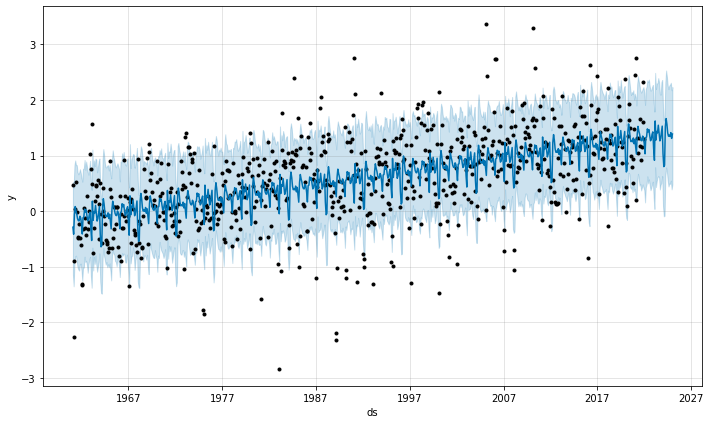

In [17]:
# plot the forecast
model.plot(forecast)
plt.show()

<Axes: xlabel='ds'>

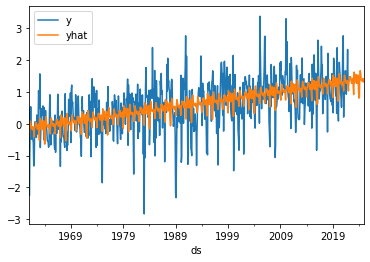

In [18]:
# plot of original and forecast temperature change value line chart
pd.concat([df.set_index('ds')['y'],
           forecast.set_index('ds')['yhat']],axis=1).plot()

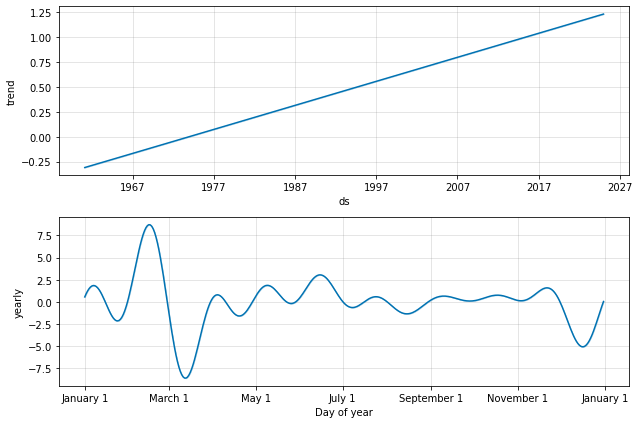

In [19]:
# plotting the components of the forecast
model.plot_components(forecast)
plt.show()

## Results
- The trend plot shows a linear increase in temperature change from 1961 to 2024. 
- The yearly seasonality plot shows that temperature change occurs mostly during the month of February.


<center> <H2> Thanks for checking the project. <br> Feedbacks are highly welcomed. </H2></center>